# Working with popular Python tools

In this notebook, we'll take a whirlwind tour through some popular Python tools, and how they can be used effectively.

First, let's import them! If you don't already have them installed, you can do so by typing e.g:

```bash
pip3 install numpy
```

in your commandline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

First off, we're going to want to set a couple of `seaborn` presets. You can change these later to see the effect they have on your plots!

In [2]:
sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('darkgrid')

### Using `astropy` to import data.

We're going to take some notes out of [an existing Astropy tutorial on Gaia data](https://learn.astropy.org/rst-tutorials/gaia-galactic-orbits.html?highlight=filtertutorials). Astropy is full of useful tools, and one of its most commonly used is the ability to query many diffrent astronomical databases. In this tutorial, we're going to look at Gaia data.

As you can see, we haven't imported `astropy` at the top of this notebook. We're only going to import the specific tools we need when we get to them.

The query below uses SQL to call 4096 random stars from the *Gaia* catalogue.

In [3]:
from astroquery.gaia import Gaia

# Specify a query in SQL code to download the data.
query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

query = Gaia.launch_job(query_text)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [5]:
results = query.get_results()
results

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956913,14.192928,11.859498
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352,6.931065,6.111273
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119075,13.968703,12.223303
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919,13.0526495,11.149786
147.19500733390703,64.89446697480156,16.93304725892566,2.382528916102615,35.3422776993022,-19.67434662793379,7.00129,7.2429867,6.664537
80.2154121697551,-4.698409026669147,10.952733453482963,94.43034433086909,-51.11033017381004,23.14373705062893,11.307271,11.843748,10.633876
130.85357387757685,-44.02677884321,10.279167265645267,-25.154708979027845,17.61973693017641,40.91502127360303,10.926985,11.411972,10.315131
339.83848696327334,57.35583655498077,11.431122594578381,-88.0760523216923,-46.024711850345625,1.0253186600965876,11.903913,12.650127,11.08852


As you can see, we've downloaded the data on these *Gaia* targets! They are stored in an Astropy Table--- which is a great alternative to Pandas. For the purposes of this tutorial though, we're going to turn this Table into a Pandas table, so you can get to grips with that.

In [6]:
df = results.to_pandas()
df.head(5)

,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,256.837099,46.508101,10.770965,-19.766571,55.926057,-17.673072,12.956913,14.192928,11.859498
1,129.458268,-6.806694,41.081670,-297.345953,43.834248,35.538145,6.576352,6.931065,6.111273
2,2.317857,9.006997,17.824765,-171.827861,-1083.874093,-148.917802,13.119075,13.968703,12.223303
3,330.412875,51.888978,13.075613,-85.307459,-34.233665,-28.726469,12.101919,13.052649,11.149786
4,147.195007,64.894467,16.933047,2.382529,35.342278,-19.674347,7.001290,7.242987,6.664537


### A quick intro to Pandas

In the previous cell, I showed the first 5 entries in our `pandas` dataframe using the `head()` command. Below follow some quick examples of useful `pandas` calls.

In [10]:
# Calling the ra column's data in a numpy array
df['ra'].values

array([256.83709852, 129.45826809,   2.31785672, ...,  95.81175412,
        91.45795579, 136.76513957])

In [12]:
# Calling the 10th row's data
df.loc[10]

ra                  260.223061
dec                 -41.295967
parallax             10.414481
pmra                 -9.499430
pmdec                 7.376596
radial_velocity      40.143532
phot_g_mean_mag      12.470139
phot_bp_mean_mag     12.951005
phot_rp_mean_mag     11.773968
bp-rp                 1.177037
Name: 10, dtype: float64

In [13]:
# Calling a specific index (5) from a specific column (ra)
df.loc[5, 'ra']

80.2154121697551

In [14]:
# Creating a new column of data
df['bp-rp'] = df['phot_bp_mean_mag'] - df['phot_rp_mean_mag']
df['bp-rp'].head(5)

0    2.333430
1    0.819792
2    1.745400
3    1.902864
4    0.578450
Name: bp-rp, dtype: float32

### Using Astropy Coordinates

One of Astropy's many useful features is being able to convert between coordinate systems. Our data have Right Angle (ra) and Declination (dec) values. How would we convert these to galactic longitude and latitude?

In [17]:
import astropy.coordinates as coord
import astropy.units as u

c = coord.SkyCoord(ra=df['ra'] * u.deg,
                   dec=df['dec'] * u.deg)

Here, we used the `astropy.units` package to specify that `ra` and `dec` have units of degrees.

Now, converting our coordinates to galactic as simple as this

In [20]:
gal = c.galactic
gal

<SkyCoord (Galactic): (l, b) in deg
    [( 72.32926334,  36.8367097 ), (232.07542475,  19.9763116 ),
     (105.68646983, -52.44715126), ..., (254.89920828, -24.03186795),
     (263.52909099, -28.35685836), (196.02535152,  41.07390023)]>

Let's add them to our dataframe!

In [21]:
df['l'] = gal.l
df['b'] = gal.b

### Plotting using Matplotlib and Seaborn

Now we have some data, let's plot it! We'll start with a simple colour-magnitude diagram (CMD). To do this, we'll have to calculate the absolute magnitude of these stars.

In order to do this, we need the distance modulus for the magnitude equation. We can obtain this using the Astropy `coord` package again, using the parallaxes in our pandas dataframe.

In [29]:
dist = coord.Distance(parallax = df['parallax'].values * u.mas)
dist

<Distance [92.84219338, 24.3417563 , 56.1017205 , ..., 62.65954025,
           71.25022791, 99.93046951] pc>

As you can see, the `coord.Distance` object has already converted these data to parsec.

In [34]:
df['MG'] = df['phot_g_mean_mag'] - dist.distmod.value

Now lets plot the absolute magnitude against the colour, which we calculated earlier.

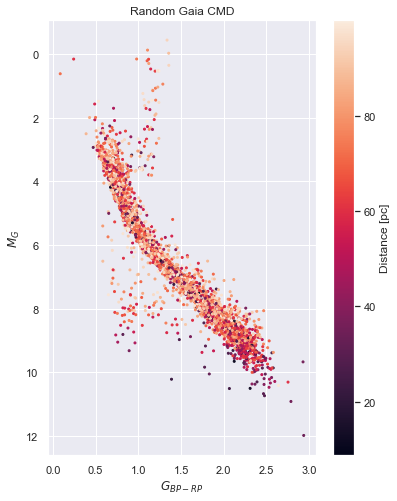

In [45]:
fig, ax = plt.subplots(figsize=(6, 8))
c = ax.scatter(df['bp-rp'], df['MG'], s=4, c=dist.value)

ax.set_title('Random Gaia CMD')
ax.invert_yaxis()
ax.set_ylabel(r'$M_G$')
ax.set_xlabel(r'$G_{BP-RP}$')

fig.colorbar(c, label='Distance [pc]')

# Try changing the colourbar to a different parameter!

We can also investigate these data using Seaborn, which is exceptionally good for distributions.

`distplot` plots a distribution for a single series.

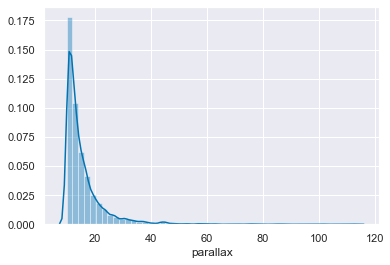

In [48]:
sns.distplot(df['parallax'])

`jointplot` plots the correlation between multiple series

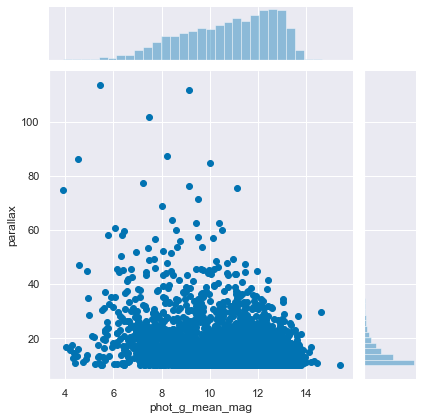

In [61]:
sns.jointplot(df['phot_g_mean_mag'], df['parallax'])

`pairplot` plots a `jointplot`, but between loads of different series at once. This is useful especially for looking at the output of bayesian anslyses, which is covered in Topic 4.

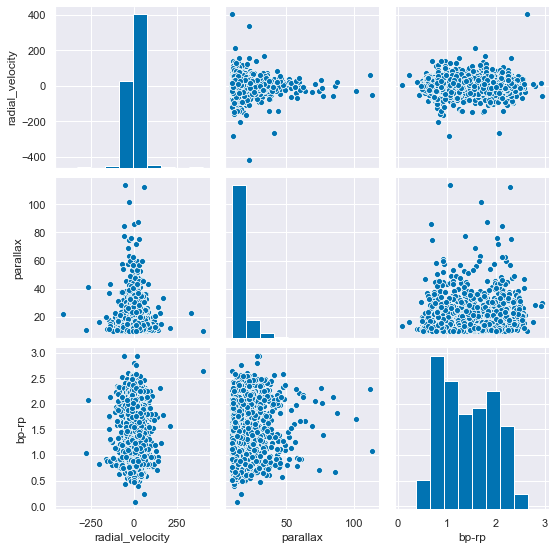

In [63]:
sns.pairplot(df[['radial_velocity', 'parallax', 'bp-rp']])

Finally, you can combine the two by passing `matplotlib` axes into `seaborn`.

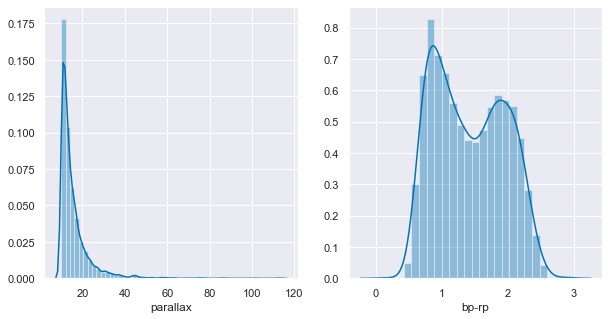

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['parallax'], ax=axes[0])
sns.distplot(df['bp-rp'], ax=axes[1])

# Try adding axes labels to this one yourself!

### What next?

This doesn't have to be where your exploration of these packages ends! There are gigantic gallleries of examples to go through and be inspired by.

- [Seaborn examples gallery](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib examples gallery](https://matplotlib.org/stable/gallery/index.html)
- [Astropy tutorials database](https://learn.astropy.org/tutorials.html)